from sklearn.neighbors import KNeighborsClassifier: Импортирует класс KNeighborsClassifier из модуля neighbors библиотеки scikit-learn. Этот класс представляет собой модель классификации на основе метода ближайших соседей (k-Nearest Neighbors, k-NN).

from sklearn.preprocessing import StandardScaler: Импортирует класс StandardScaler из модуля preprocessing библиотеки scikit-learn. Этот класс используется для стандартизации признаков (Feature Scaling).

from sklearn import datasets: Импортирует модуль datasets библиотеки scikit-learn, который содержит стандартные наборы данных, включая Iris.

from sklearn.model_selection import train_test_split: Импортирует функцию train_test_split из модуля model_selection библиотеки scikit-learn. Эта функция используется для разделения данных на тренировочную и тестовую выборки.

from sklearn.metrics import accuracy_score: Импортирует функцию accuracy_score из модуля metrics библиотеки scikit-learn. Эта функция используется для вычисления точности классификации.

In [28]:
# Connecting the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

iris = datasets.load_iris(): Загружает стандартный набор данных Iris с помощью функции load_iris() из модуля datasets. Данные об ирисах загружаются и сохраняются в переменной iris.

X = iris.data[:, [0, 1]]; y = iris.target: Извлекает только первые два признака (sepal length и sepal width) из загруженных данных и сохраняет их в переменной X. Метки классов (target) сохраняются в переменной y.

In [2]:
# Load IRIS dataset
iris = datasets.load_iris ()
X = iris.data[: , [0 ,1]]; y = iris.target

X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y): Разделяет данные X и метки классов y на тренировочную и тестовую выборки. Параметры test_size устанавливают долю тестовой выборки, random_state задает начальное состояние генератора случайных чисел для воспроизводимости, а stratify используется для обеспечения стратификации данных при разделении.

In [3]:
# Create train and test split
X_tr , X_t , y_tr , y_t = train_test_split(X, y, test_size =0.3,
random_state =42, stratify=y)

sc = StandardScaler(): Создает экземпляр класса StandardScaler, который будет использоваться для стандартизации данных.

sc.fit(X_tr): Обучает стандартизатор на тренировочных данных X_tr, вычисляя средние и стандартные отклонения признаков.

X_tr_std = sc.transform(X_tr); X_t_std = sc.transform(X_t): Применяет обученный стандартизатор к тренировочным данным X_tr и тестовым данным X_t, стандартизируя их признаки. Стандартизированные данные сохраняются в переменных X_tr_std и X_t_std.

In [4]:
# Feature Scaling using StandardScaler
sc = StandardScaler ()
sc.fit(X_tr)
X_tr_std = sc.transform(X_tr); X_t_std = sc.transform(X_t)

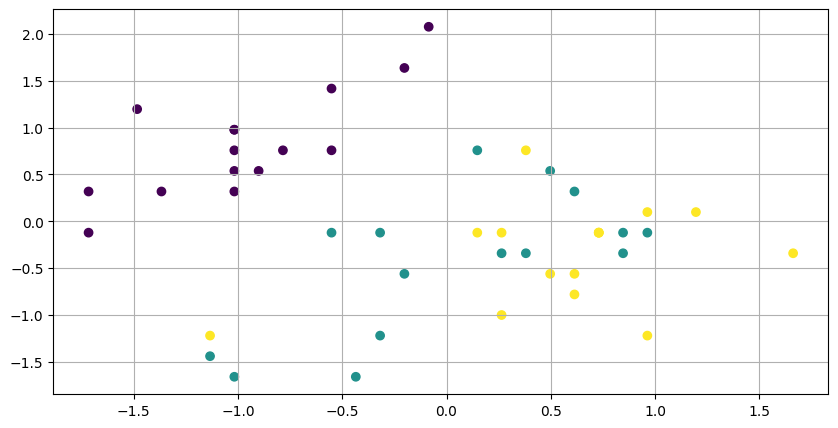

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_t_std[:, 0], X_t_std[:,1], c=y_t)
plt.grid()
plt.show()

knn = KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform', algorithm='auto').fit(X_tr_std, y_tr): Создает экземпляр класса KNeighborsClassifier с настройками, такими как количество соседей (n_neighbors=5), метрика расстояния (p=2 для евклидова расстояния), веса соседей (weights='uniform' означает, что все соседи имеют одинаковый вес) и алгоритм расчета (algorithm='auto' для автоматического выбора). Затем обучает модель k-NN на стандартизированных тренировочных данных X_tr_std и соответствующих метках классов y_tr.

In [19]:
# Fit the model
knn = KNeighborsClassifier(n_neighbors =5, p=2, weights='uniform',
algorithm='auto').fit(X_tr_std , y_tr)

predicted = knn.predict(X_t_std): Использует обученную модель k-NN для предсказания классов для тестовых данных X_t_std. Предсказанные метки классов сохраняются в переменной predicted.

In [20]:
predicted = knn.predict(X_t_std)

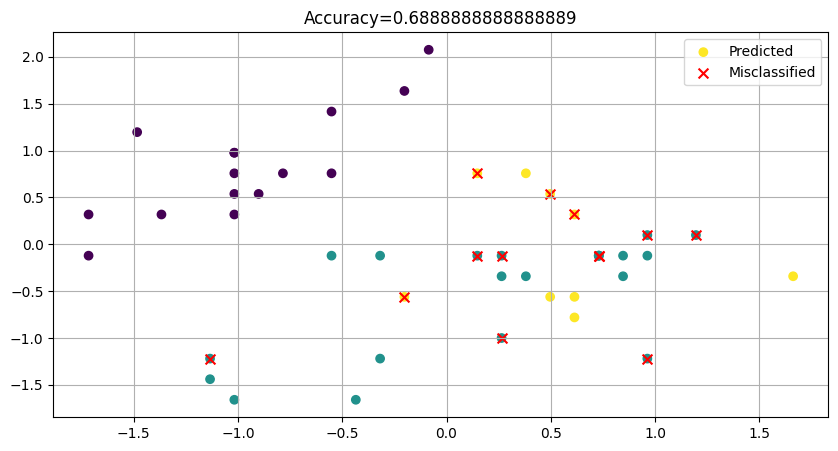

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_t_std[:, 0], X_t_std[:,1], c=predicted, cmap='viridis', marker='o', label='Predicted')
misclassified_indices = y_t != predicted
plt.scatter(X_t_std[misclassified_indices, 0], X_t_std[misclassified_indices, 1], c='red', marker='x', s=50, label='Misclassified')
plt.grid()
plt.title(f'Accuracy={accuracy_score(y_t, predicted)}')
plt.legend()
plt.show()

**********
Важным критерием для алгоритма KNN является правильный выбор гиперпараметра, при котором алгоритм будет давать наименьшую ошибку.
Можно просто перебрать в цикле и сравнить эффективность работы алгоритма для разных входных гиперпараметров.

Посмотрим такую реализацию на линейно неразделимом множестве:

from sklearn.datasets import make_circles: Импортирует функцию "make_circles" из модуля "datasets" библиотеки scikit-learn. Эта функция используется для генерации данных в форме двух пересекающихся окружностей.

X1, y1 = make_circles(n_samples=500, noise=0.06, random_state=42): Создает данные, состоящие из двух переменных. "X1" будет содержать сгенерированные точки данных, а "y1" будет содержать соответствующие метки классов. В данной строке выполняются следующие действия:

n_samples=500: Генерирует 500 точек данных. noise=0.06: Добавляет шум к данным для усложнения задачи классификации. random_state=42: Задает начальное состояние генератора случайных чисел для воспроизводимости результатов.

In [22]:
from sklearn.datasets import make_circles
X , y = make_circles(n_samples =500, noise =0.06, random_state =42)

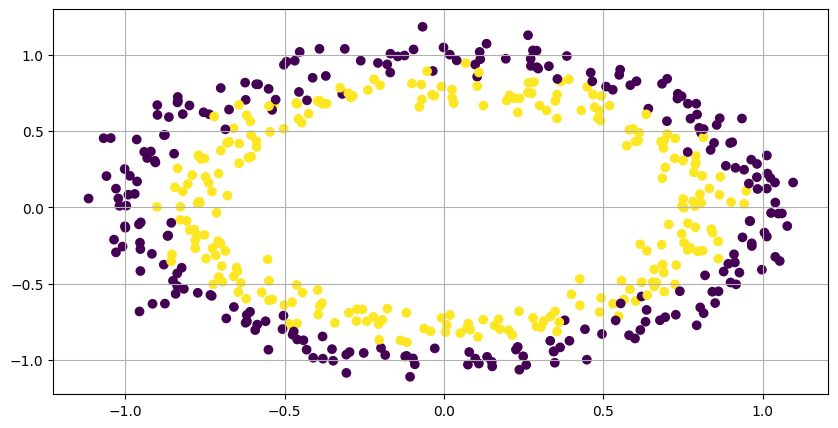

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:,1], c=y)
plt.grid()
plt.show()

Создаем тренировочную и тестовую модель

Стандартизируем данные

In [27]:
X_tr , X_t , y_tr , y_t = train_test_split(X, y, test_size =0.3,
random_state =42, stratify=y)
sc = StandardScaler ()
sc.fit(X_tr)
X_tr_std = sc.transform(X_tr); X_t_std = sc.transform(X_t)

Для i ∈ 1 ∶ 19 проверяем результаты работы модели: график ошибок классификации в
зависимости от i на рисунке

In [52]:
error_rate = np.zeros(0)
for i in range (1 ,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_tr_std , y_tr)
  pred_i = knn.predict(X_t_std)
  error_rate = np.append(error_rate ,[np.mean(pred_i != y_t)])
n_neighbours = np.argmin(error_rate) + 1

5

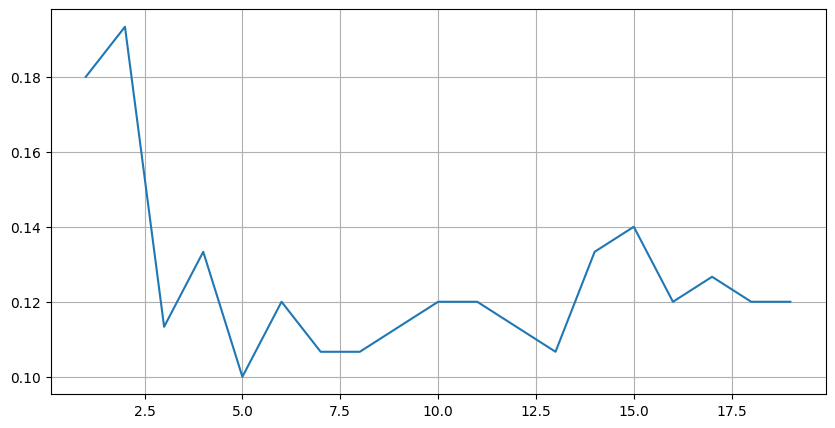

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 20), error_rate)
plt.grid()
plt.show()

Прогназируем для количество соседей равным 5

In [75]:
knn = KNeighborsClassifier(n_neighbors=n_neighbours)
knn.fit(X_tr_std, y_tr)
predicted = knn.predict(X_t_std)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

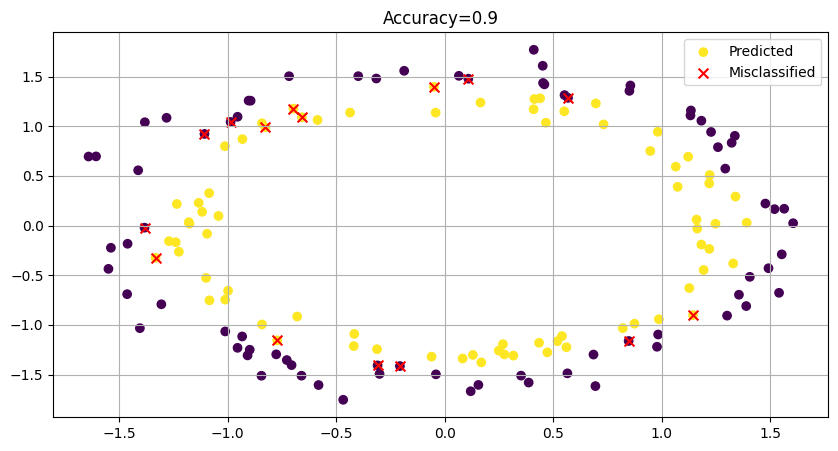

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_t_std[:, 0], X_t_std[:,1], c=predicted, cmap='viridis', marker='o', label='Predicted')
misclassified_indices = y_t != predicted
plt.scatter(X_t_std[misclassified_indices, 0], X_t_std[misclassified_indices, 1], c='red', marker='x', s=50, label='Misclassified')
plt.grid()
plt.title(f'Accuracy={accuracy_score(y_t, predicted)}')
plt.legend()
plt.show()

Результат получился довольно таки неплохим

  Более удобный сбособ определить самые эффективные гиперпараметры - сделать перебор сетки в GridSearch.

  GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров.

  Но необходимо помнить, что такой подход может быть весьма ресурсо затратным

from sklearn.model_selection import GridSearchCV: Импортирует класс GridSearchCV из модуля model_selection библиотеки scikit-learn. Этот класс используется для выполнения поиска по сетке (Grid Search), который позволяет находить наилучшие гиперпараметры модели машинного обучения.

grid_params: Создает словарь grid_params, который содержит набор параметров и их значения, для которых будет выполняться поиск по сетке. В данном случае, рассматриваются следующие параметры:

'n_neighbors': Список значений, задающих количество соседей.
'weights': Список значений, задающих веса для соседей ('uniform' или 'distance').
'metric': Список значений, задающих метрику расстояния между точками ('minkowski', 'euclidean' или 'manhattan').
knn = KNeighborsClassifier(): Создает экземпляр класса KNeighborsClassifier, который представляет собой модель k-ближайших соседей (KNN) с параметрами по уумолчанию.

gs = GridSearchCV(knn, grid_params, scoring='accuracy', refit=True): Создает экземпляр класса GridSearchCV для выполнения поиска по сетке:

knn: Это модель, для которой будет выполняться поиск по сетке, в данном случае, модель KNN.
grid_params: Это словарь параметров и их значений, которые будут рассматриваться в поиске.
scoring='accuracy': Это оценочная метрика, которая будет использоваться для оценки качества модели. Здесь указана точность классификации.
refit=True: Этот параметр указывает, что после выполнения поиска по сетке, модель будет переобучена на наилучших параметрах.

In [76]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : np.arange(3, 30),
'weights' : ['uniform','distance'],
'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier ()
gs = GridSearchCV(knn , grid_params , scoring='accuracy', refit=True)

g_res = gs.fit(X_tr_std, y_tr): Запускает поиск по сетке с использованием тренировочных данных X_tr_std и соответствующих меток классов y_tr. Результаты поиска сохраняются в переменной g_res.

print(g_res.best_params_): Выводит лучшие найденные параметры после выполнения поиска по сетке. В данном случае, выводит параметры, которые обеспечивают наилучшую точность модели KNN на тренировочных данных.

In [77]:
g_res = gs.fit(X_tr_std , y_tr)
print(g_res.best_params_)
best_params = g_res.best_params_
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])
best_knn.fit(X_tr_std, y_tr)
predicted = best_knn.predict(X_t_std)
best_knn.get_params()

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'distance'}

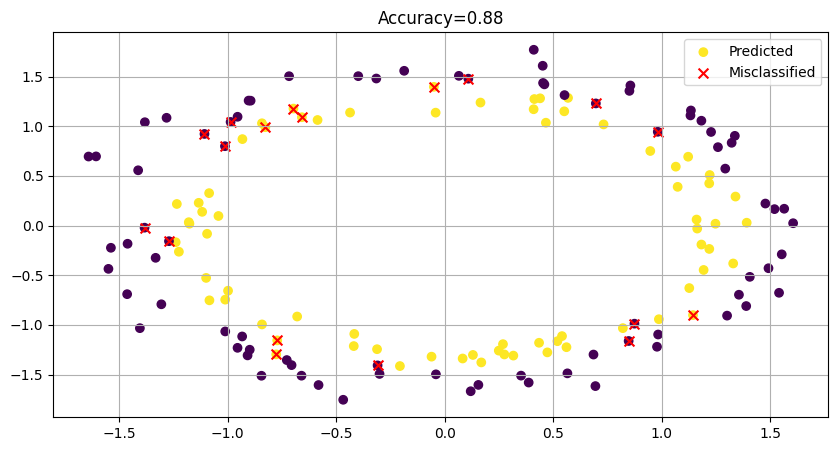

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_t_std[:, 0], X_t_std[:,1], c=predicted, cmap='viridis', marker='o', label='Predicted')
misclassified_indices = y_t != predicted
plt.scatter(X_t_std[misclassified_indices, 0], X_t_std[misclassified_indices, 1], c='red', marker='x', s=50, label='Misclassified')
plt.grid()
plt.title(f'Accuracy={accuracy_score(y_t, predicted)}')
plt.legend()
plt.show()